*See eda for background of analysis

The goal of this notebook is to analyze what various quarterback statistics affect their ratings. Various machine learning models will be sampled to find an optimized model that best fits the data to a regression model. The findings can the be used to infer what are the best and east areas a quarterback and or college can focus on to improve the players skill. With subsequent results the data can move over for visualization and plotting of feature importances.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('csv_files/full_stats.csv')

In [3]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [4]:
df.head()

,NAME,COLLEGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,AGE,DRAFTED
0,Pat White,BIG12,2005.0,87.5,42.1,267.0,44.3,15.9,32.3,-2.9,-1.6,83.8,77.0,76.2,69.4,46.7,65.0,114.0,57.0,828.0,7.3,50.0,8.0,5.0,5.0,132.4,131.0,952.0,7.3,76.0,7.0,19.0,1.0
1,Vince Young,BIG12,2005.0,86.1,71.5,532.0,75.0,44.5,36.2,-8.1,2.2,80.2,94.8,92.0,85.0,71.9,212.0,325.0,65.2,3036.0,9.3,75.0,26.0,10.0,13.0,163.9,155.0,1050.0,6.8,80.0,12.0,22.0,1.0
2,Brian Brohm,ACC,2005.0,81.2,48.9,385.0,49.8,56.1,1.7,-9.4,2.0,78.9,76.3,84.0,54.4,55.2,207.0,301.0,68.8,2883.0,9.6,76.0,19.0,5.0,17.0,166.7,NaN,NaN,NaN,NaN,NaN,20.0,1.0
3,Rudy Carpenter,PAC-12,2005.0,80.8,39.5,307.0,42.7,51.6,2.5,-13.1,1.2,79.2,68.1,79.0,48.2,50.1,156.0,228.0,68.4,2273.0,10.0,69.0,17.0,2.0,21.0,175.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN
4,Matt Leinart,PAC-12,2005.0,80.5,51.1,529.0,61.5,64.9,6.5,-8.8,-1.0,73.2,94.1,95.8,78.7,40.7,283.0,431.0,65.7,3815.0,8.9,67.0,28.0,8.0,17.0,157.7,NaN,NaN,NaN,NaN,NaN,22.0,1.0


# Regression Model

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from scipy import stats

In [6]:
df.drop(['NAME', 'PAA', 'EPA', 'RAW', 'RTG', 'RATT', 'RYDS', 'RAVG', 'RTD', 'RLNG', 'AGE', 'DRAFTED'], axis=1, inplace=True)

In [7]:
dum = pd.get_dummies(df['COLLEGE'])

In [8]:
df = pd.concat([df, dum], axis=1)

In [9]:
df.drop('COLLEGE', axis = 1, inplace = True)

In [10]:
df = df.dropna()

In [11]:
df2 = df.copy()

In [12]:
predictors = df.drop(['QBR'], axis= 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['QBR'],predictors_int).fit()
model.summary()

C:\Users\bdtol\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QBR   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     887.8
Date:                Fri, 01 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:39:32   Log-Likelihood:                -5142.1
No. Observations:                1795   AIC:                         1.034e+04
Df Residuals:                    1765   BIC:                         1.051e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -197.4122     49.896     -3.957      0.000    -295.273     -99.552
YEAR            0.0896      0.027      3.320      0.001       0.037       0.143
PLAYS          -0.0345      0.003    -11.517      0.000      -0.040      -0.029
PASS            0.4626      0.017     27.669      0.000       0.430       0.495
RUN             0.4849      0.013     38.023      0.000       0.460       0.510
QBR_SACK        0.5893      0.058     10.122      0.000       0.475       0.703
PEN             0.5549      0.053     10.395      0.000       0.450       0.660
OVERALL        -0.4117      0.079     -5.184      0.000      -0.567      -0.256
OFFENSE         0.4914      0.049     10.035      0.000       0.395       0.587
DEFENSE         0.2833      0.048      5.903      0.000       0.189       0.377
SPECIAL         0.0881      0.017      5.059      0.000       0.054       0.122
CMP            -0.2067      0.018    -11.218      0.000      -0.243      -0.171
PATT            0.2169      0.012     18.627      0.000       0.194       0.240
CMP%            0.7209      0.059     12.312      0.000       0.606       0.836
PYDS           -0.0107      0.001    -10.053      0.000      -0.013      -0.009
PAVG            3.3046      0.302     10.944      0.000       2.712       3.897
PLNG           -0.0015      0.009     -0.169      0.866      -0.019       0.016
PTD            -0.0794      0.028     -2.810      0.005      -0.135      -0.024
INT             0.0146      0.038      0.384      0.701      -0.060       0.089
TOTAL_SACKS     0.0814      0.037      2.173      0.030       0.008       0.155
ACC           -14.2186      4.557     -3.120      0.002     -23.157      -5.280
American      -19.6102      4.534     -4.325      0.000     -28.502     -10.718
BIG10         -14.8229      4.559     -3.252      0.001     -23.764      -5.882
BIG12         -15.7418      4.553     -3.458      0.001     -24.671      -6.812
C-USA         -21.6144      4.534     -4.767      0.000     -30.507     -12.722
INDEP         -19.9348      4.571     -4.361      0.000     -28.900     -10.970
MAC           -21.5184      4.522     -4.758      0.000     -30.388     -12.649
MTN-WEST      -20.7094      4.525     -4.577      0.000     -29.584     -11.834
PAC-12        -14.0803      4.562     -3.086      0.002     -23.029      -5.132
SEC           -12.8156      4.567     -2.806      0.005     -21.773      -3.858
SUN-BELT      -22.3458      4.567     -4.893      0.000     -31.304     -13.388
==============================================================================
Omnibus:                       25.172   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.670
Skew:                          -0.084   Prob(JB):                     8.94e-10
Kurtosis:                       3.727   Cond. N

In [19]:
y = df['QBR']
X = predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = mse(y_train,y_hat_train)
mse_test = mse(y_test, y_hat_test)


linR2 = r2_score(y_test,y_hat_test)
linRMSE =  np.sqrt(mse_test)
linMAE =  mae(y_test, y_hat_test)

lin = pd.DataFrame(['Linear Regression', linR2, linRMSE, linMAE])
lin = pd.DataFrame.transpose(lin)
lin.columns = ['Model', 'R-sq', 'RMSE', 'MAE']
lin

,Model,R-sq,RMSE,MAE
0,Linear Regression,0.938907,4.26609,3.25493


Initial model performed well will good fit of data and low error 

## Remove outliers

In [134]:
df2_col = df2.columns[:20]

In [143]:
for i in df2_col:
    df2 = df2.loc[np.abs(stats.zscore(df2[i])) < 3]

In [145]:
predictors = df2.drop(['QBR'], axis= 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df2['QBR'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QBR   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     843.2
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:57:54   Log-Likelihood:                -4728.7
No. Observations:                1677   AIC:                             9517.
Df Residuals:                    1647   BIC:                             9680.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -176.3855     49.278     -3.579      0.000    -273.040     -79.731
YEAR            0.0797      0.027      2.994      0.003       0.027       0.132
PLAYS          -0.0343      0.003    -11.299      0.000      -0.040      -0.028
PASS            0.4724      0.017     28.142      0.000       0.439       0.505
RUN             0.5383      0.014     37.466      0.000       0.510       0.566
QBR_SACK        0.6342      0.058     10.901      0.000       0.520       0.748
PEN             0.5430      0.055      9.862      0.000       0.435       0.651
OVERALL        -0.1746      0.086     -2.041      0.041      -0.342      -0.007
OFFENSE         0.3399      0.052      6.475      0.000       0.237       0.443
DEFENSE         0.1345      0.052      2.586      0.010       0.032       0.236
SPECIAL         0.0418      0.019      2.251      0.024       0.005       0.078
CMP            -0.1955      0.022     -8.937      0.000      -0.238      -0.153
PATT            0.2200      0.013     16.821      0.000       0.194       0.246
CMP%            0.6884      0.069     10.003      0.000       0.553       0.823
PYDS           -0.0120      0.001     -9.923      0.000      -0.014      -0.010
PAVG            3.8808      0.360     10.777      0.000       3.175       4.587
PLNG           -0.0018      0.009     -0.200      0.841      -0.019       0.015
PTD            -0.0766      0.029     -2.682      0.007      -0.133      -0.021
INT             0.0150      0.038      0.394      0.693      -0.059       0.089
TOTAL_SACKS     0.0858      0.038      2.287      0.022       0.012       0.159
ACC           -12.3124      4.500     -2.736      0.006     -21.138      -3.487
American      -17.8060      4.481     -3.974      0.000     -26.595      -9.017
BIG10         -12.9348      4.501     -2.874      0.004     -21.763      -4.107
BIG12         -13.6542      4.500     -3.034      0.002     -22.480      -4.828
C-USA         -19.7506      4.476     -4.412      0.000     -28.530     -10.971
INDEP         -18.2043      4.515     -4.032      0.000     -27.060      -9.349
MAC           -19.5517      4.467     -4.377      0.000     -28.313     -10.790
MTN-WEST      -18.8366      4.473     -4.211      0.000     -27.610     -10.064
PAC-12        -12.0609      4.502     -2.679      0.007     -20.891      -3.231
SEC           -10.5846      4.510     -2.347      0.019     -19.431      -1.738
SUN-BELT      -20.6894      4.508     -4.589      0.000     -29.532     -11.847
==============================================================================
Omnibus:                        8.812   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.680
Skew:                           0.014   Prob(JB):                      0.00291
Kurtosis:                       3.408   Cond. N

As the final model the outlier were removed. This had little change in the data, but now we can assume all data present is relevant

## Dropping non-significant figures

In [146]:
df2.drop(['PLNG', 'INT'], axis=1, inplace=True)

In [147]:
predictors = df2.drop(['QBR'], axis= 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df2['QBR'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QBR   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     906.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:00:16   Log-Likelihood:                -4728.8
No. Observations:                1677   AIC:                             9514.
Df Residuals:                    1649   BIC:                             9666.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -171.7352     48.076     -3.572      0.000    -266.031     -77.439
YEAR            0.0772      0.026      2.972      0.003       0.026       0.128
PLAYS          -0.0342      0.003    -11.319      0.000      -0.040      -0.028
PASS            0.4704      0.015     30.553      0.000       0.440       0.501
RUN             0.5379      0.014     37.564      0.000       0.510       0.566
QBR_SACK        0.6338      0.058     10.907      0.000       0.520       0.748
PEN             0.5445      0.055      9.909      0.000       0.437       0.652
OVERALL        -0.1737      0.085     -2.033      0.042      -0.341      -0.006
OFFENSE         0.3391      0.052      6.468      0.000       0.236       0.442
DEFENSE         0.1339      0.052      2.577      0.010       0.032       0.236
SPECIAL         0.0415      0.019      2.239      0.025       0.005       0.078
CMP            -0.1953      0.022     -8.942      0.000      -0.238      -0.152
PATT            0.2200      0.013     16.827      0.000       0.194       0.246
CMP%            0.6891      0.069     10.026      0.000       0.554       0.824
PYDS           -0.0120      0.001     -9.959      0.000      -0.014      -0.010
PAVG            3.8731      0.354     10.940      0.000       3.179       4.568
PTD            -0.0759      0.028     -2.681      0.007      -0.131      -0.020
TOTAL_SACKS     0.0853      0.037      2.277      0.023       0.012       0.159
ACC           -11.8884      4.390     -2.708      0.007     -20.498      -3.279
American      -17.3816      4.371     -3.977      0.000     -25.954      -8.809
BIG10         -12.5017      4.387     -2.850      0.004     -21.106      -3.897
BIG12         -13.2298      4.390     -3.014      0.003     -21.841      -4.619
C-USA         -19.3371      4.371     -4.424      0.000     -27.910     -10.764
INDEP         -17.7792      4.406     -4.035      0.000     -26.421      -9.137
MAC           -19.1330      4.359     -4.389      0.000     -27.683     -10.583
MTN-WEST      -18.4152      4.364     -4.220      0.000     -26.975      -9.855
PAC-12        -11.6402      4.395     -2.649      0.008     -20.260      -3.020
SEC           -10.1650      4.403     -2.309      0.021     -18.801      -1.529
SUN-BELT      -20.2640      4.399     -4.607      0.000     -28.892     -11.636
==============================================================================
Omnibus:                        8.694   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.485
Skew:                           0.015   Prob(JB):                      0.00321
Kurtosis:                       3.404   Cond. No.                     2.35e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the co

In [148]:
y = df2['QBR']
X = predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = mse(y_train,y_hat_train)
mse_test = mse(y_test, y_hat_test)


print('R-sq:', r2_score(y_test,y_hat_test))
print('MAE:', mae(y_test, y_hat_test))
print('Test RMSE:', np.sqrt(mse_test))
print('Train RMSE:', np.sqrt(mse_train))

R-sq: 0.9364954233109246
MAE: 3.125458741045584
Test RMSE: 4.024091651404655
Train RMSE: 4.083011047914904


The finalized model only displayed two features with P-values greater than 0.05, which were then dropped. With only significant value left there was a small reduction of the fit of the model while giving a reduction in error. With low variance between out train and test RMSE it can be assumed that the data is well fitted.


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

In [18]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [19]:
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

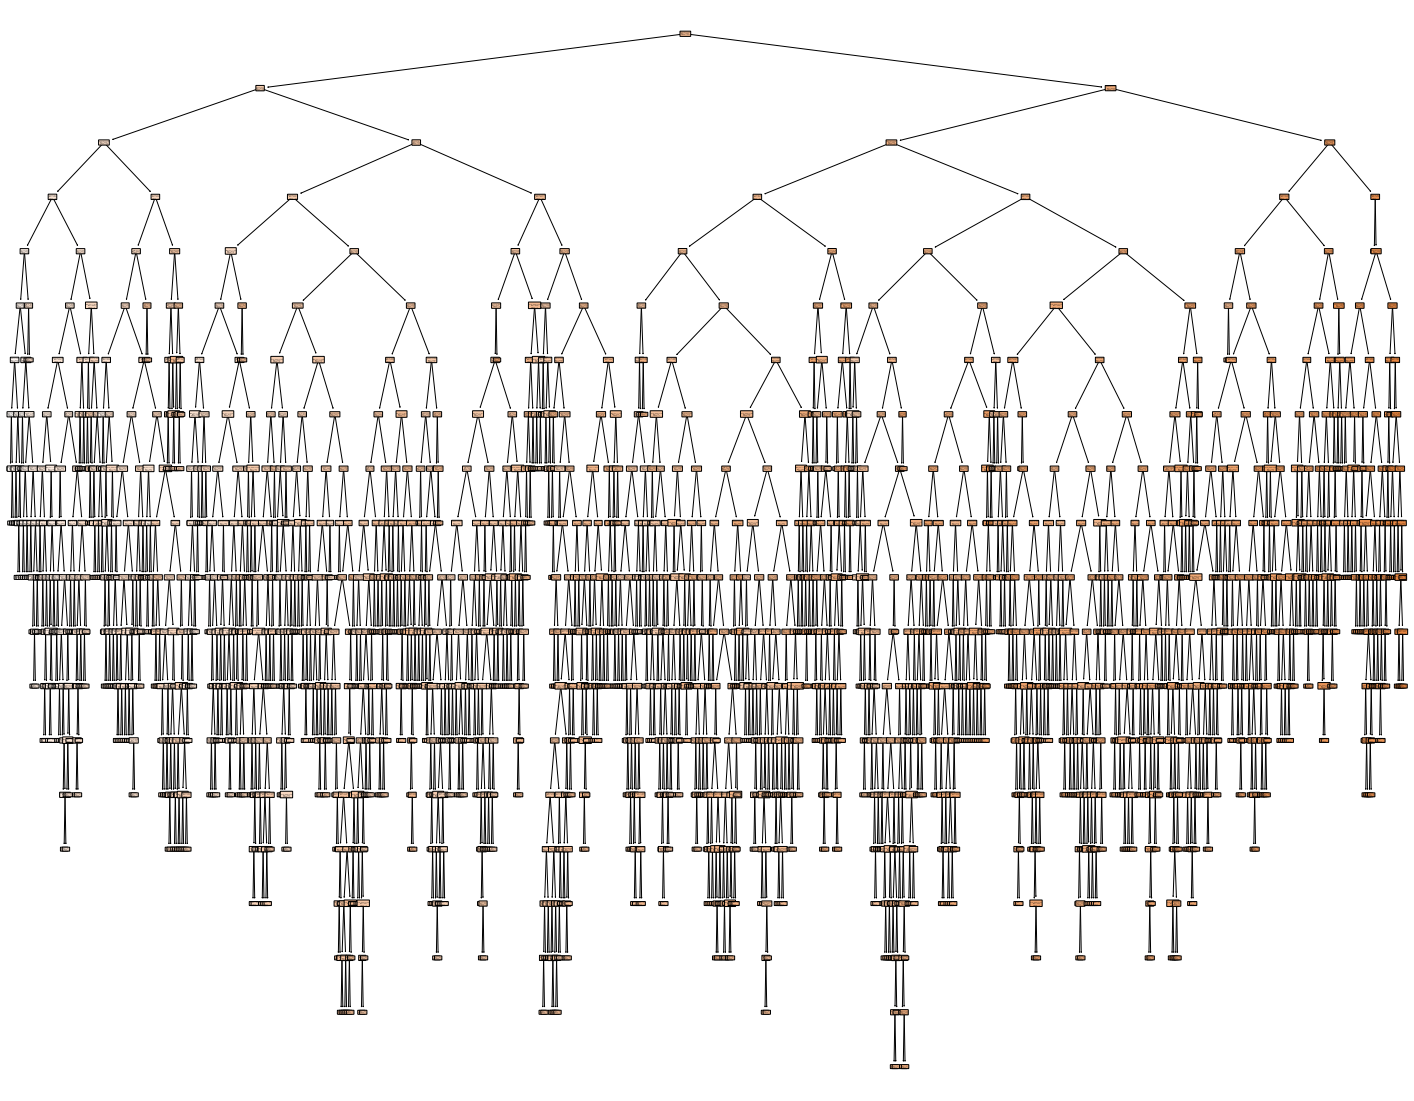

In [16]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regressor, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [17]:
def plot_feature_importance(importance,names,model_type, f,l):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][f:l], y=fi_df['feature_names'][f:l])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

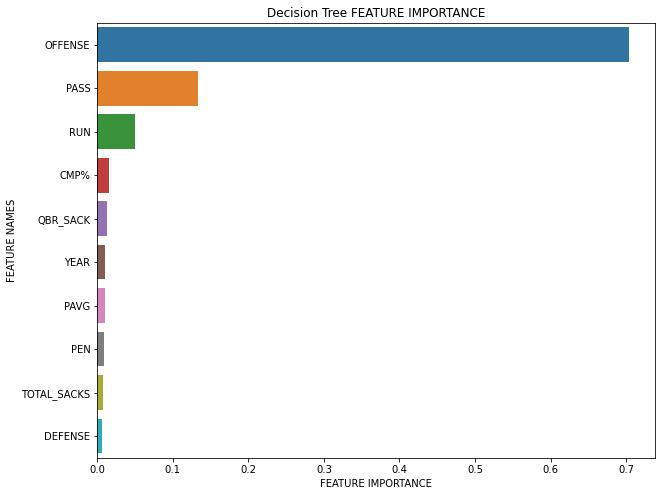

In [18]:
plot_feature_importance(regressor.feature_importances_, X_train.columns, 'Decision Tree', 0, 10)

In [20]:
# Make predictions and evaluate 
y_pred = regressor.predict(X_test)

dtR2 = r2_score(y_test,y_pred)
dtRMSE = np.sqrt(mse(y_test, y_pred))
dtMAE = mae(y_test, y_pred)
                 
dt = pd.DataFrame(['Decision Tree', dtR2, dtRMSE, dtMAE])
dt = pd.DataFrame.transpose(dt)
dt.columns = ['Model', 'R-sq', 'RMSE', 'MAE']
dt

,Model,R-sq,RMSE,MAE
0,Decision Tree,0.792624,7.85983,5.93007


As the next model made, the performance had gone down drastically with the error increasing. Several iterations of this will need to be done to try and improve its performance.

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [22]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [23]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred = forest.predict(X_test)

rfRMSE =  np.sqrt(mse(y_test, y_pred))
rfMAE = mae(y_test, y_pred)
rfR2 =  r2_score(y_test,y_pred)
                  
rf = pd.DataFrame(['Random Forest', rfR2, rfRMSE, rfMAE])
rf = pd.DataFrame.transpose(rf)
rf.columns = ['Model', 'R-sq', 'RMSE', 'MAE']
rf

,Model,R-sq,RMSE,MAE
0,Random Forest,0.900877,5.43402,4.25432


Switch the Decision Tree to a Random Forest gave us a much better fit of our data points and reduced our error down to an acceptable amount. As compared to the linear model it is still lacking 

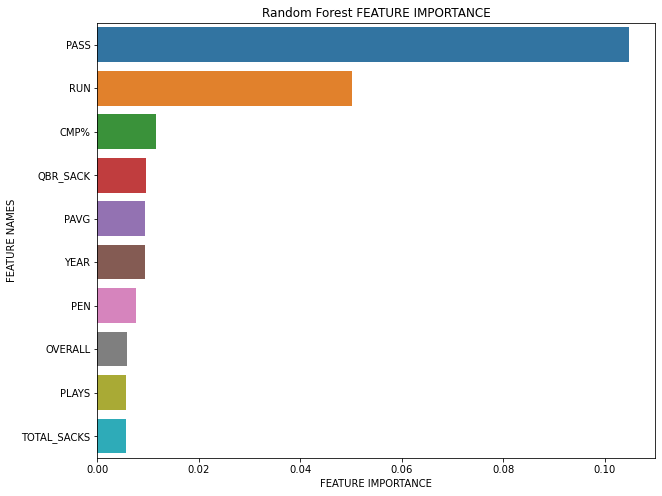

In [24]:
plot_feature_importance(forest.feature_importances_, X_train.columns, 'Random Forest', 1, 11)

# Grid Search

In [25]:
from sklearn.model_selection import  GridSearchCV

In [26]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [234]:
ft_param_grid = {
    'criterion':['mse'],
    'max_features' : [0.2, 0.4, 0.7, 1.0],
    'max_depth': [120, 130, 140],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2, 3]
}


In [78]:
# Instantiate GridSearchCV
ft_regressor = RandomForestRegressor()
ft_grid_search = GridSearchCV(ft_regressor, ft_param_grid, cv=3, return_train_score=True)

# Fit to the data
ft_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [120, 130, 140],
                         'max_features': [0.2, 0.4, 0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True)

In [79]:
ft_grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 120,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [27]:
forest = RandomForestRegressor(criterion = 'mse',
                              max_depth = 120,
                              max_features = 0.7,
                              min_samples_leaf = 1,
                              min_samples_split = 4)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=120, max_features=0.7, min_samples_split=4)

In [28]:
y_pred = forest.predict(X_test)

gsR2 = r2_score(y_test,y_pred)
gsRMSE = np.sqrt(mse(y_test, y_pred))
gsMAE = mae(y_test, y_pred)

gs = pd.DataFrame(['Grid Search-(RF)', gsR2, gsRMSE, gsMAE])
gs = pd.DataFrame.transpose(gs)
gs.columns = ['Model', 'R-sq', 'RMSE', 'MAE']
gs

,Model,R-sq,RMSE,MAE
0,Grid Search-(RF),0.902107,5.40021,4.19218


With a grid search to find the best parameter on the random forest the results were disappointing. There was such a small change in the metrics it could be assumed to be negligible.

# Neural Nerwork

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [30]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=123)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=123) # 0.25 x 0.8 = 0.2

n_features = X_train.shape[1]

In [31]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()

In [32]:
numeric_columns = X_train.columns 

# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform train data
X_train_scaled = pd.DataFrame(ss_X.fit_transform(X_train), columns=numeric_columns)

# Transform validate and test data
X_val_scaled = pd.DataFrame(ss_X.transform(X_val), columns=numeric_columns)
X_test_scaled = pd.DataFrame(ss_X.transform(X_test), columns=numeric_columns)

In [33]:
# Instantiate StandardScaler
ss_y = StandardScaler()

# Fit and transform train labels
y_train = y_train.values.reshape(-1,1)
y_train_scaled = ss_y.fit_transform(y_train)

# Transform validate and test labels
y_val = y_val.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_val_scaled = ss_y.transform(y_val)
y_test_scaled = ss_y.transform(y_test)

In [34]:
def nn_metrics(model):
    # Generate predictions on validate data
    np.random.seed(123)
    y_val_pred_scaled = model.predict(X_val_scaled)

    # Transform the predictions back to original scale
    y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)
   
    print('R-sq score:', r2_score(y_val,y_val_pred))
    print('RMSE:',np.sqrt(mse(y_val, y_val_pred)))
    print('MAE:', mae(y_val, y_val_pred))


## normalized

In [35]:
# Model with all normalized inputs and outputs
np.random.seed(123)
normalized_model = Sequential()
normalized_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
normalized_model.add(layers.Dense(50, activation='relu'))
normalized_model.add(layers.Dense(1, activation='linear'))

# Compile the model
normalized_model.compile(optimizer='SGD', 
                         loss='mse', 
                         metrics=['mse']) 

# Train the model
history = normalized_model.fit(X_train_scaled, 
                     y_train_scaled, 
                     batch_size=32, 
                     epochs=150, 
                     validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/150
34/34 [==============================] - 1s 18ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.2706 - val_mse: 0.2706
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 0.2040 - mse: 0.2040 - val_loss: 0.1563 - val_mse: 0.1563
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1441 - mse: 0.1441 - val_loss: 0.1277 - val_mse: 0.1277
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1213 - mse: 0.1213 - val_loss: 0.1154 - val_mse: 0.1154
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0945 - mse: 0.0945 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 8/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0904 - 

Epoch 125/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 126/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 127/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 128/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 129/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 130/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 131/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 132/150
34/34 [==============================] - 0s 4ms/step - 

In [36]:
nn_metrics(normalized_model)

R-sq score: 0.9365980842628355
RMSE: 4.313411321842538
MAE: 3.3750813215887976


In [37]:
# Generate predictions on test data
y_test_pred_scaled = normalized_model.predict(X_test_scaled)

# Transform the predictions back to original scale
y_test_pred = ss_y.inverse_transform(y_test_pred_scaled)

nnR2 =  r2_score(y_test,y_test_pred)
nnRMSE = np.sqrt(mse(y_test, y_test_pred))
nnMAE = mae(y_test, y_test_pred)

nn = pd.DataFrame(['NN-normalized', nnR2, nnRMSE, nnMAE])
nn = pd.DataFrame.transpose(nn)
nn.columns = ['Model', 'R-sq', 'RMSE', 'MAE']
nn

,Model,R-sq,RMSE,MAE
0,NN-normalized,0.936273,4.3311,3.45474


As the first neural network made the model performed well. It is comparable to our linear model with only a slight decrease in its performance. Other optimizers will have to be compared to get the best overview of neural networks

In [38]:
def plot_performance(model):
    """
    Input a trained model.
    
    Outputs plots of the Training and Validation mse and loss.  
    """
    
    mse = model.history['mse']
    val_mse = model.history['val_mse']
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    epochs = range(len(mse))
    
    plt.plot(epochs, mse, 'blue', label='Training MSE')
    plt.plot(epochs, val_mse, 'red', label='Validation MSE')
    plt.title('Training and Validation MSE')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'blue', label='Training Loss')
    plt.plot(epochs, val_loss, 'red', label='Validation Loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()

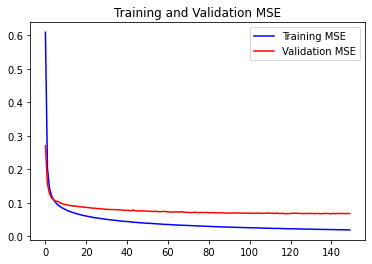

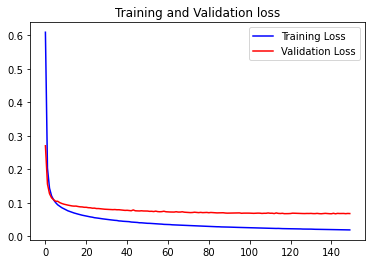

In [39]:
plot_performance(history)

## he

In [40]:
np.random.seed(123)
he_model = Sequential()

# Add the first hidden layer
he_model.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', input_shape=(n_features,)))

# Add another hidden layer
he_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
he_model.add(layers.Dense(1, activation='linear'))

# Compile the model
he_model.compile(optimizer='SGD', 
                 loss='mse', 
                 metrics=['mse'])

# Train the model
he_model.fit(X_train_scaled, 
             y_train_scaled, 
             batch_size=32, 
             epochs=150, 
             validation_data=(X_val, y_val_scaled))

Epoch 1/150
34/34 [==============================] - 1s 17ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 92762.7344 - val_mse: 92762.7344
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 0.2420 - mse: 0.2420 - val_loss: 76907.5391 - val_mse: 76907.5391
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1913 - mse: 0.1913 - val_loss: 79829.7031 - val_mse: 79829.7031
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1643 - mse: 0.1643 - val_loss: 80152.4844 - val_mse: 80152.4844
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 87932.4531 - val_mse: 87932.4531
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1338 - mse: 0.1338 - val_loss: 82235.8047 - val_mse: 82235.8047
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 86996.4062 - val_mse: 86996.4062
Epoch 8/150
34/34 [=======

34/34 [==============================] - 0s 4ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 4207.7056 - val_mse: 4207.7056
Epoch 119/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 6277.9204 - val_mse: 6277.9204
Epoch 120/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 4332.6274 - val_mse: 4332.6274
Epoch 121/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 2324.3828 - val_mse: 2324.3828
Epoch 122/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 3320.1187 - val_mse: 3320.1187
Epoch 123/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 1750.3055 - val_mse: 1750.3055
Epoch 124/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 3187.7493 - val_mse: 3187.7493
Epoch 125/150
34/34 [====================

In [41]:
nn_metrics(he_model)

y_val_pred_scaled = he_model.predict(X_val_scaled)
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)
heR2 =  r2_score(y_val, y_val_pred)
heRMSE = np.sqrt(mse(y_val, y_val_pred))
heMAE = mae(y_val, y_val_pred)

R-sq score: 0.921332144109917
RMSE: 4.804722838927658
MAE: 3.8629642348435596


The he initializer did well, however in terms of our baseline neural network it is not sufficient nor is it to the linear model

In [42]:
he = pd.DataFrame(['NN-he', heR2, heRMSE, heMAE])
he = pd.DataFrame.transpose(he)
he.columns = ['Model', 'R-sq', 'RMSE', 'MAE']

## lecun

In [43]:
np.random.seed(123)
lecun_model = Sequential()

# Add the first hidden layer
lecun_model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu', input_shape=(n_features,)))

# Add another hidden layer
lecun_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
lecun_model.add(layers.Dense(1, activation='linear'))

# Compile the model
lecun_model.compile(optimizer='SGD', 
                    loss='mse', 
                    metrics=['mse'])

# Train the model
lecun_model.fit(X_train_scaled, 
                y_train_scaled, 
                batch_size=32, 
                epochs=150, 
                validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/150
34/34 [==============================] - 1s 15ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.2309 - val_mse: 0.2309
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 0.2185 - mse: 0.2185 - val_loss: 0.1638 - val_mse: 0.1638
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1638 - mse: 0.1638 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1381 - mse: 0.1381 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1218 - mse: 0.1218 - val_loss: 0.1151 - val_mse: 0.1151
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 7/150
34/34 [==============================] - ETA: 0s - loss: 0.1029 - mse: 0.102 - 0s 4ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 8/150
34/34 [=========================

Epoch 63/150
34/34 [==============================] - 0s 3ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 64/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 65/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 66/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0794 - val_mse: 0.0794
Epoch 67/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0792 - val_mse: 0.0792
Epoch 68/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0795 - val_mse: 0.0795
Epoch 69/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0793 - val_mse: 0.0793
Epoch 70/150
34/34 [==============================] - 0s 4ms/step - loss: 0.

Epoch 125/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 126/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 127/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 128/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 129/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 130/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0816 - val_mse: 0.0816
Epoch 131/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 132/150
34/34 [==============================] - 0s 4ms/step - 

In [44]:
nn_metrics(lecun_model)

y_val_pred_scaled = lecun_model.predict(X_val_scaled)
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)
lcR2 =  r2_score(y_val,y_val_pred)
lcRMSE = np.sqrt(mse(y_val, y_val_pred))
lcMAE = mae(y_val, y_val_pred)

R-sq score: 0.9240297040200152
RMSE: 4.721626099951479
MAE: 3.7381806309840804


In [45]:
lc = pd.DataFrame(['NN-Lecun', lcR2, lcRMSE, lcMAE])
lc = pd.DataFrame.transpose(lc)
lc.columns = ['Model', 'R-sq', 'RMSE', 'MAE']

The lecun model is similar to that of the previous model. Good performance but in comparison to the other models still not enough to justify making it the finalized model

## rmsprop

In [46]:
np.random.seed(123)
rmsprop_model = Sequential()
rmsprop_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
rmsprop_model.add(layers.Dense(50, activation='relu'))
rmsprop_model.add(layers.Dense(1, activation='linear'))

# Compile the model
rmsprop_model.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=['mse'])

# Train the model
rmsprop_model.fit(X_train_scaled, 
                  y_train_scaled, 
                  batch_size=32, 
                  epochs=150, 
                  validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/150
34/34 [==============================] - 1s 15ms/step - loss: 0.2540 - mse: 0.2540 - val_loss: 0.1316 - val_mse: 0.1316
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1029 - mse: 0.1029 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0837 - val_mse: 0.0837
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 8/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0378 - 

Epoch 125/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 126/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 127/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 128/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 129/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 130/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0743 - val_mse: 0.0743
Epoch 131/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0762 - val_mse: 0.0762
Epoch 132/150
34/34 [==============================] - 0s 4ms/step - 

In [47]:
nn_metrics(rmsprop_model)

y_val_pred_scaled = rmsprop_model.predict(X_val_scaled)
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)
propR2 =  r2_score(y_val,y_val_pred)
propRMSE = np.sqrt(mse(y_val, y_val_pred))
propMAE = mae(y_val, y_val_pred)


R-sq score: 0.927649546409549
RMSE: 4.607764906019892
MAE: 3.7368384231099845


In [48]:
prop = pd.DataFrame(['NN-RMSprop', propR2, propRMSE, propMAE])
prop = pd.DataFrame.transpose(prop)
prop.columns = ['Model', 'R-sq', 'RMSE', 'MAE']

There is yet to be any positive change in neural networks. All having consistent outputs but not different enough from each other

## adam

In [49]:
np.random.seed(123)
adam_model = Sequential()
adam_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
adam_model.add(layers.Dense(50, activation='relu'))
adam_model.add(layers.Dense(1, activation='linear'))

# Compile the model
adam_model.compile(optimizer='Adam', 
                   loss='mse', 
                   metrics=['mse'])

# Train the model
adam_model.fit(X_train_scaled, 
               y_train_scaled, 
               batch_size=32, 
               epochs=150, 
               validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/150
34/34 [==============================] - 1s 17ms/step - loss: 0.5021 - mse: 0.5021 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 0.1298 - mse: 0.1298 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 8/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0452 - 

Epoch 125/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0870 - val_mse: 0.0870
Epoch 126/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 127/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 128/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 129/150
34/34 [==============================] - 0s 5ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 130/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 131/150
34/34 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0853 - val_mse: 0.0853
Epoch 132/150
34/34 [==============================] - 0s 4ms/step - 

In [50]:
nn_metrics(adam_model)

y_val_pred_scaled = adam_model.predict(X_val_scaled)
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)
adR2 =  r2_score(y_val,y_val_pred)
adRMSE = np.sqrt(mse(y_val, y_val_pred))
adMAE = mae(y_val, y_val_pred)

R-sq score: 0.9203145701647807
RMSE: 4.8356976999399315
MAE: 3.795788294226346


As the final neural network model, the requirements did not meet the standards of the baseline neural network of the linear model. The normalized model will be assumed as the optimal neural network to compare against the other models

In [51]:
ad = pd.DataFrame(['NN-Adam', adR2, adRMSE, adMAE])
ad = pd.DataFrame.transpose(ad)
ad.columns = ['Model', 'R-sq', 'RMSE', 'MAE']

In [52]:
models = pd.concat([lin, dt, rf, gs, nn, he, lc, prop, ad]) 

In [53]:
models

,Model,R-sq,RMSE,MAE
0,Linear Regression,0.938907,4.26609,3.25493
0,Decision Tree,0.792624,7.85983,5.93007
0,Random Forest,0.900877,5.43402,4.25432
0,Grid Search-(RF),0.902107,5.40021,4.19218
0,NN-normalized,0.936273,4.3311,3.45474
0,NN-he,0.921332,4.80472,3.86296
0,NN-Lecun,0.92403,4.72163,3.73818
0,NN-RMSprop,0.92765,4.60776,3.73684
0,NN-Adam,0.920315,4.8357,3.79579


The finalized model was the multivariate linear regression algorithm. Creating the final model outliers’ non-significant figures were dropped. There was a small reduction of the fit of the model while giving a reduction in error. With low variance between out train and test RMSE it can be assumed that the data is well fitted. Moving foward, data analysis will be based on this models outputs



# Cross Validation

In [13]:
X = df.drop(['QBR'], axis = 1)
y = df[['QBR']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [14]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()

numeric_columns = X_train.columns 

# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform train data
X_train_scaled = pd.DataFrame(ss_X.fit_transform(X_train), columns=numeric_columns)

X_test_scaled = pd.DataFrame(ss_X.transform(X_test), columns=numeric_columns)

In [15]:
n_features = X_train_scaled.shape[1]

In [16]:
# Instantiate StandardScaler
ss_y = StandardScaler()

# Fit and transform Y (train)
y_train_scaled = ss_y.fit_transform(y_train)

# Transform test Y (test)
y_test_scaled = ss_y.transform(y_test)

In [25]:
# Define a function that returns a compiled Keras model 
from keras import models
from keras import layers
def create_baseline_model():
    
    # Initialize model
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(10, activation='relu', input_shape=(n_features,)))

    # Second hidden layer
    model.add(layers.Dense(5, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model

In [26]:
# Wrap the above function for use in cross-validation
from keras.wrappers.scikit_learn import KerasRegressor
keras_wrapper_1 = KerasRegressor(create_baseline_model,  
                                 epochs=150, 
                                 batch_size=256, 
                                 verbose=0)

In [27]:
from sklearn.model_selection import cross_val_predict
np.random.seed(123)
cv_baseline_preds = cross_val_predict(keras_wrapper_1, X_train, y_train_scaled, cv=5)

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train_scaled, cv_baseline_preds))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [31]:
# Convert the predictions back to original scale
baseline_preds = ss_y.inverse_transform(cv_baseline_preds)

# RMSE on train data (original scale)
np.sqrt(mean_squared_error(y_train, baseline_preds))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').